# Objective

* Predict whether the customer ( Applicant ) loan will be Reject ( Bad ) or Approved ( Good )

* Yes = loan Reject ( Bad Customers ) , No =loan approved ( Good  Customers )

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

import os

import warnings
warnings.filterwarnings("ignore")

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [2]:
import pandas as pd
Bank = pd.read_csv (r"C:\Users\AKASH N\Desktop\Machine Learning\2. Logistic regression\Bank_Loan (1).csv")
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

#### 2.1. Data Type and conversion

In [3]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Loan_ID              981 non-null    object
 1   Age                  981 non-null    int64 
 2   Gender               957 non-null    object
 3   Married              978 non-null    object
 4   Dependents           981 non-null    int64 
 5   Education            981 non-null    object
 6   Self_Employed        926 non-null    object
 7   ApplicantIncome      981 non-null    int64 
 8   LoanAmount           981 non-null    int64 
 9   Previous_Loan_Taken  981 non-null    object
 10  Cibil_Score          981 non-null    int64 
 11  Property_Area        981 non-null    object
 12  Customer_Bandwith    981 non-null    object
 13  Tenure               981 non-null    int64 
 14  Loan_Status          981 non-null    object
dtypes: int64(6), object(9)
memory usage: 115.1+ KB


#### 2.2. Identifying & Treatment Missing Value

In [4]:
# count the number of NaN values in each column
Bank.isnull().sum()

Loan_ID                 0
Age                     0
Gender                 24
Married                 3
Dependents              0
Education               0
Self_Employed          55
ApplicantIncome         0
LoanAmount              0
Previous_Loan_Taken     0
Cibil_Score             0
Property_Area           0
Customer_Bandwith       0
Tenure                  0
Loan_Status             0
dtype: int64

In [5]:
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


#### Replacing Missing value by Mode

In [6]:
Bank.Gender.value_counts(dropna=False)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64

In [7]:
for i in ['Married','Gender','Self_Employed']:
    Bank[i].fillna(Bank[i].mode()[0], inplace=True)

In [8]:
Bank.Gender.value_counts(dropna=False)

Male      799
Female    182
Name: Gender, dtype: int64

In [9]:
Bank.isnull().sum()

Loan_ID                0
Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64

In [10]:
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


In [11]:
#Tenure to categorical column
def tenure_lab(Bank) :
    if Bank["Tenure"] <= 6 :
        return "Tenure_0_6"
    elif (Bank["Tenure"] > 6) & (Bank["Tenure"] <= 12 ):
        return "Tenure_7_12"
    elif (Bank["Tenure"] > 12) & (Bank["Tenure"] <= 24) :
        return "Tenure_13_24"
    elif (Bank["Tenure"] > 24) & (Bank["Tenure"] <= 36) :
        return "Tenure_25-36"
    elif Bank["Tenure"] > 36 :
        return "Tenure_gt_36"
# banK = x
Bank["Tenure_group"] = Bank.apply(lambda x :tenure_lab(x),axis = 1) #x = bank

In [12]:
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status,Tenure_group
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No,Tenure_gt_36
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes,Tenure_13_24
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No,Tenure_7_12
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No,Tenure_7_12
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No,Tenure_7_12


<Axes: >

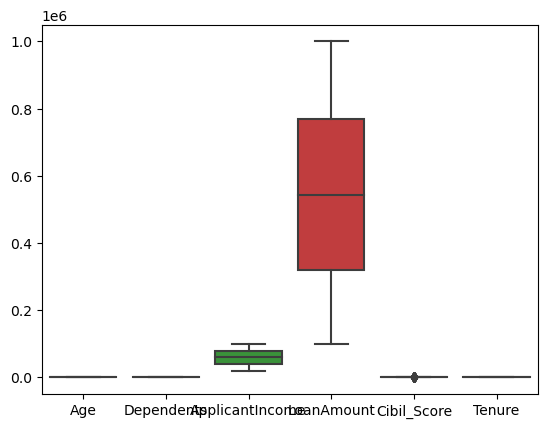

In [13]:
sns.boxplot(data=Bank)

In [14]:
Bank.Tenure_group.value_counts()

Tenure_gt_36    267
Tenure_13_24    266
Tenure_25-36    259
Tenure_7_12     131
Tenure_0_6       58
Name: Tenure_group, dtype: int64

In [15]:
((267+266+259)/981)*100

80.73394495412845

In [16]:
((58+131)/981)*100

19.26605504587156

* 80% of customer required loan tenure for more than a Year

# Data Visualization

#### Bad Rate Analysis 

In [17]:
Bank.Loan_Status.value_counts(normalize=True)*100

No     72.579001
Yes    27.420999
Name: Loan_Status, dtype: float64

In [18]:
import plotly.express as px

fig = px.pie(Bank,names='Loan_Status',color='Loan_Status',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

### Reject customer data  = Bad Customer

In [19]:
Bank_Yes= Bank[Bank["Loan_Status"] == "Yes"]  # 269

Bank_Yes

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status,Tenure_group
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes,Tenure_13_24
7,LP001014,54,Male,Yes,1,Graduate,No,53213,368715,No,447,Semiurban,Bad,17,Yes,Tenure_13_24
9,LP001020,33,Male,Yes,0,Graduate,No,57348,347577,Yes,378,Semiurban,Bad,18,Yes,Tenure_13_24
13,LP001029,32,Male,No,4,Graduate,No,43208,309303,Yes,585,Rural,Medium,39,Yes,Tenure_gt_36
17,LP001036,45,Female,No,2,Graduate,No,27568,830422,No,659,Urban,Good,35,Yes,Tenure_25-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,LP002802,24,Male,No,4,Graduate,No,29313,127392,No,618,Semiurban,Medium,36,Yes,Tenure_25-36
953,LP002858,57,Female,No,2,Graduate,No,91401,777888,No,726,Rural,Good,7,Yes,Tenure_7_12
956,LP002869,45,Male,Yes,4,Not Graduate,No,63617,421266,Yes,599,Rural,Medium,17,Yes,Tenure_13_24
960,LP002879,23,Male,Yes,4,Graduate,No,96201,996625,No,846,Rural,Good,22,Yes,Tenure_13_24


In [20]:
fig = px.sunburst(Bank_Yes, path=["Gender",'Education','Self_Employed',
                                    'Tenure_group','Property_Area'])
fig.show()

### Interpetation : - Trend Analysis
* Customer ==  Male,Graduate,salaried & Tenure  less than a year , Rural   == Loan Rejected 
* customer ==  Male,Graduate,salaried & Tenure  less than a year ,Urban   == Loan Rejected 
* customer ==  Female,Graduate,salaried & Tenure <= 6 Months ,Rural    == Loan Rejected 

# 5. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [21]:
Bank = Bank.drop('Loan_ID',axis=1)
Bank.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status,Tenure_group
0,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No,Tenure_gt_36
1,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes,Tenure_13_24
2,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No,Tenure_7_12
3,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No,Tenure_7_12
4,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No,Tenure_7_12


In [22]:
Bank.select_dtypes(include=[np.number]).columns.tolist()

['Age', 'Dependents', 'ApplicantIncome', 'LoanAmount', 'Cibil_Score', 'Tenure']

In [23]:
# Qualitative Variable
Quantitative_Variable = Bank[Bank.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10


In [24]:
Qualitative_Variable = Bank[Bank.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group
0,Male,No,Graduate,No,Yes,Urban,Good,No,Tenure_gt_36
1,Male,Yes,Graduate,No,Yes,Rural,Good,Yes,Tenure_13_24
2,Male,Yes,Graduate,Yes,Yes,Urban,Good,No,Tenure_7_12


### Converting qualitative Variable into number

In [25]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group
0,1,0,0,0,1,2,1,0,4
1,1,1,0,0,1,0,1,1,1
2,1,1,0,1,1,2,1,0,3
3,1,1,1,0,1,2,1,0,3
4,1,0,0,0,1,2,1,0,3


## Combining the data set 

In [26]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,1,0,0,0,1,2,1,0,4,43,3,54005,334113,668,43
1,1,1,0,0,1,0,1,1,1,57,2,28817,736026,684,13
2,1,1,0,1,1,2,1,0,3,25,3,99939,712432,788,10
3,1,1,1,0,1,2,1,0,3,44,1,38470,267161,888,9
4,1,0,0,0,1,2,1,0,3,58,1,28991,402474,703,11


# Data Partition 

In [27]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Loan_Status', axis = 1)
Y = Final_combined[['Loan_Status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [28]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0


# Model building 

# Logistics Regression

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy',cv=5)
Model3.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [30]:
Model3.feature_names_in_

array(['Gender', 'Married', 'Education', 'Self_Employed',
       'Previous_Loan_Taken', 'Property_Area', 'Customer_Bandwith',
       'Tenure_group', 'Age', 'Dependents', 'ApplicantIncome',
       'LoanAmount', 'Cibil_Score', 'Tenure'], dtype=object)

In [31]:
Model3.get_feature_names_out()

array(['Self_Employed', 'Previous_Loan_Taken', 'Age', 'Cibil_Score',
       'Tenure'], dtype=object)

In [32]:
X_train = X_train.loc[:,['Self_Employed', 'Previous_Loan_Taken', 'Age', 'Cibil_Score','Tenure']]
X_train

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure
920,1,1,29,700,47
666,0,1,20,722,46
797,0,1,26,803,9
925,0,0,49,327,6
735,0,1,38,800,45
...,...,...,...,...,...
418,0,1,38,601,31
192,0,1,60,377,15
399,0,0,51,475,30
484,0,1,42,613,11


In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output

In [34]:
output.intercept_  # beto 

array([8.15393113])

In [35]:
output.coef_  # Beta 1 -- 

array([[-0.21346655, -3.59331266,  0.01323502, -0.00966732, -0.00401951]])

In [36]:
output.feature_names_in_

array(['Self_Employed', 'Previous_Loan_Taken', 'Age', 'Cibil_Score',
       'Tenure'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [37]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Loan_Status
920,1,1,29,700,47,0
666,0,1,20,722,46,0
797,0,1,26,803,9,0
925,0,0,49,327,6,1
735,0,1,38,800,45,0


train['Predicted']=output.predict(X_train)
train.head()

In [38]:
train['Probability']= output.predict_proba(X_train)[:,1]
train

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Loan_Status,Probability
920,1,1,29,700,47,0,0.097521
666,0,1,20,722,46,0,0.087913
797,0,1,26,803,9,0,0.052436
925,0,0,49,327,6,1,0.996378
735,0,1,38,800,45,0,0.054620
...,...,...,...,...,...,...,...
418,0,1,38,601,31,0,0.295022
192,0,1,60,377,15,1,0.838870
399,0,0,51,475,30,1,0.983958
484,0,1,42,613,11,0,0.298638


In [39]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Loan_Status,Probability,Predicted
920,1,1,29,700,47,0,0.097521,0
666,0,1,20,722,46,0,0.087913,0
797,0,1,26,803,9,0,0.052436,0
925,0,0,49,327,6,1,0.996378,1
735,0,1,38,800,45,0,0.054620,0


# Step 7 : Model Performance Metrics

In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Loan_Status'])
matrix

array([[553,  97],
       [  9, 125]], dtype=int64)

In [41]:
Accuracy_Train=((553+125)/(784)*100)
print(Accuracy_Train)

86.4795918367347


* Accuracy of Model is 86% , So we say Model good fit data  

In [42]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       562
           1       0.93      0.56      0.70       222

    accuracy                           0.86       784
   macro avg       0.89      0.77      0.81       784
weighted avg       0.87      0.86      0.85       784



* Accuracy of  Model is 86%,Hence Model is good Fit 
* Accuracy of Bad Customer Capture by Model is 19% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 99% (Specificity)

# Step 8 : Predictions on Test Dataset

In [43]:
X_test = X_test.loc[:,['Self_Employed', 'Previous_Loan_Taken', 'Age', 'Cibil_Score','Tenure']]
X_test

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure
607,0,1,36,707,31
401,0,1,32,415,23
634,0,1,30,839,21
98,0,1,33,862,12
143,0,1,52,643,29
...,...,...,...,...,...
73,0,0,45,359,30
610,0,1,54,708,38
520,0,1,56,791,48
786,0,1,39,574,14


In [44]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Loan_Status
607,0,1,36,707,31,0
401,0,1,32,415,23,1
634,0,1,30,839,21,0
98,0,1,33,862,12,0
143,0,1,52,643,29,0


In [45]:
test['Probability']=output.predict_proba(X_test)[:,1]
test.head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Loan_Status,Probability
607,0,1,36,707,31,0,0.127603
401,0,1,32,415,23,1,0.706771
634,0,1,30,839,21,0,0.037774
98,0,1,33,862,12,0,0.032796
143,0,1,52,643,29,0,0.252785


In [46]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Loan_Status,Probability,Predicted
607,0,1,36,707,31,0,0.127603,0
401,0,1,32,415,23,1,0.706771,1
634,0,1,30,839,21,0,0.037774,0
98,0,1,33,862,12,0,0.032796,0
143,0,1,52,643,29,0,0.252785,0


# Step 9 : Model Performance Metrics on Test data 

In [47]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Loan_Status'])
print(matrix)

[[146  19]
 [  4  28]]


In [48]:
Accuracy_test=((146+28)/(206)*100)
Accuracy_test

84.46601941747572

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test['Loan_Status'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       150
           1       0.88      0.60      0.71        47

    accuracy                           0.88       197
   macro avg       0.88      0.78      0.82       197
weighted avg       0.88      0.88      0.87       197



* Accuracy of  Model is 84%,Hence Model Performance is good Fit on test Data
* Accuracy of Bad Customer Capture by Model is 17% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 99% 

# Business / Client Submission 

* For future Prediction below 4 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [50]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,8.153931


In [51]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient'])
abc

,Coefficient
Self_Employed,-0.213467
Previous_Loan_Taken,-3.593313
Age,0.013235
Cibil_Score,-0.009667
Tenure,-0.004020


In [52]:
Model_Values.append(abc)

,Coefficient
Intercept,8.153931
Self_Employed,-0.213467
Previous_Loan_Taken,-3.593313
Age,0.013235
Cibil_Score,-0.009667
Tenure,-0.004020


In [53]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       562
           1       0.93      0.56      0.70       222

    accuracy                           0.86       784
   macro avg       0.89      0.77      0.81       784
weighted avg       0.87      0.86      0.85       784



# Finish

# Step 10 :- ROCR Plot

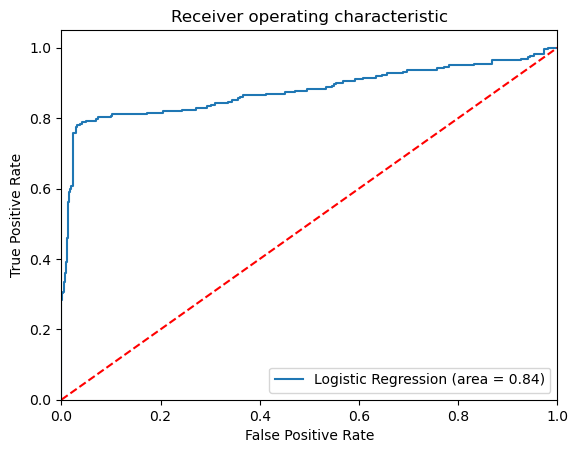

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Live Data 

In [55]:
train.columns

Index(['Self_Employed', 'Previous_Loan_Taken', 'Age', 'Cibil_Score', 'Tenure',
       'Loan_Status', 'Probability', 'Predicted'],
      dtype='object')

In [56]:
live_data = Bank.loc[[484,192,220,500,399],['Self_Employed', 'Previous_Loan_Taken', 'Age', 'Cibil_Score', 'Tenure']]
live_data

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure
484,No,Yes,42,613,11
192,No,Yes,60,377,15
220,No,No,21,433,37
500,No,Yes,23,840,34
399,No,No,51,475,30


In [57]:
# Qualitative Variable
number = live_data[live_data.select_dtypes(include=[np.number]).columns.tolist()]
Category = live_data[live_data.select_dtypes(include=['object']).columns.tolist()]

In [58]:
from sklearn.preprocessing import LabelEncoder
Category=Category.apply(LabelEncoder().fit_transform) # label in ascending order
Category.head()

,Self_Employed,Previous_Loan_Taken
484,0,1
192,0,1
220,0,0
500,0,1
399,0,0


In [59]:
Final_live_data = pd.concat([Category,number],axis=1)
Final_live_data .head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure
484,0,1,42,613,11
192,0,1,60,377,15
220,0,0,21,433,37
500,0,1,23,840,34
399,0,0,51,475,30


In [60]:
Final_live_data['Probability']=output.predict_proba(Final_live_data)[:,1]
Final_live_data.head()

,Self_Employed,Previous_Loan_Taken,Age,Cibil_Score,Tenure,Probability
484,0,1,42,613,11,0.298638
192,0,1,60,377,15,0.838870
220,0,0,21,433,37,0.983652
500,0,1,23,840,34,0.032540
399,0,0,51,475,30,0.983958


# Model Export

In [61]:
import pickle

pickle.dump(dt, open(r"C:\Users\AKASH N\Desktop\BankLoan prediction\build.pkl",'wb'))  #model = dt # Exporting model from python to laptop

NameError: name 'dt' is not defined

In [ ]:
X_train.head()